load checkpoint from http path: https://download.openmmlab.com/mmpose/top_down/swin/swin_l_p4_w7_coco_384x288-c36b7845_20220705.pth


Downloading: "https://download.openmmlab.com/mmpose/top_down/swin/swin_l_p4_w7_coco_384x288-c36b7845_20220705.pth" to /home0/murakamih/.cache/torch/hub/checkpoints/swin_l_p4_w7_coco_384x288-c36b7845_20220705.pth
100%|██████████| 776M/776M [00:17<00:00, 45.6MB/s] 


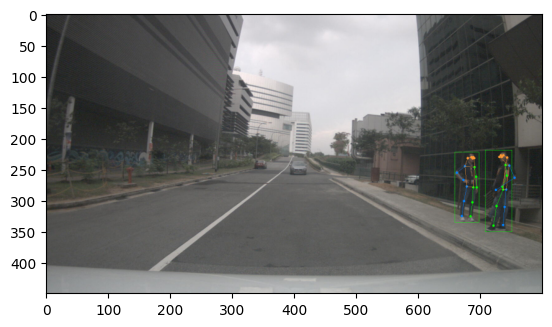

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mmpose.apis import (inference_top_down_pose_model, init_pose_model,
                         vis_pose_result, process_mmdet_results)
from mmdet.apis import inference_detector, init_detector

pose_config = '../mmpose/configs/body/2d_kpt_sview_rgb_img/topdown_heatmap/coco/swin_l_p4_w7_coco_384x288.py'
pose_checkpoint = 'https://download.openmmlab.com/mmpose/top_down/swin/swin_l_p4_w7_coco_384x288-c36b7845_20220705.pth'
# det_config = '../mmpose/demo/mmdetection_cfg/faster_rcnn_r50_fpn_coco.py'
# det_checkpoint = 'https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

# initialize pose model
pose_model = init_pose_model(pose_config, pose_checkpoint)
# initialize detector
# det_model = init_detector(det_config, det_checkpoint)

img = '../pedestrian/nuimages_ped/v1.0-train/img/00a14431d93f4f32adf683e139dfdf94.jpg'

# inference detection
# mmdet_results = inference_detector(det_model, img)

# extract person (COCO_ID=1) bounding boxes from the detection results
# person_results = process_mmdet_results(mmdet_results, cat_id=1)
bboxes = [
    [1318, 447, 1396, 672, 0.9],
    [1416, 440, 1503, 703, 0.5],
    [1399, 453, 1520, 684, 0.3]
]
person_results = []
for bbox in bboxes:
    person = {}
    person['bbox'] = np.array(bbox, dtype=np.float32)
    person_results.append(person)

# inference pose
pose_results, returned_outputs = inference_top_down_pose_model(
    pose_model,
    img,
    person_results,
    bbox_thr=0.3,
    format='xyxy',
    dataset=pose_model.cfg.data.test.type)

# show pose estimation results
vis_result = vis_pose_result(
    pose_model,
    img,
    pose_results,
    dataset=pose_model.cfg.data.test.type,
    show=False)
# reduce image size
vis_result = cv2.resize(vis_result, dsize=None, fx=0.5, fy=0.5)

plt.imshow(cv2.cvtColor(vis_result, cv2.COLOR_BGR2RGB))
plt.show()


In [3]:
person_results

[{'bbox': [1318, 447, 1396, 672]},
 {'bbox': [1416, 440, 1503, 703]},
 {'bbox': [1399, 453, 1520, 684]}]

In [1]:
# Check Pytorch installation
import torch, torchvision

print('torch version:', torch.__version__, torch.cuda.is_available())
print('torchvision version:', torchvision.__version__)

# Check MMPose installation
import mmpose

print('mmpose version:', mmpose.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version

print('cuda version:', get_compiling_cuda_version())
print('compiler information:', get_compiler_version())

/usr/local/lib/python3.9/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


torch version: 1.13.1+cu117 True
torchvision version: 0.14.1+cu117
mmpose version: 0.29.0
cuda version: 11.7
compiler information: GCC 9.3


/usr/local/lib/python3.9/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


load checkpoint from http path: https://download.openmmlab.com/mmpose/top_down/hrnet/hrnet_w48_coco_256x192-b9e0b3ab_20200708.pth
load checkpoint from http path: https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth


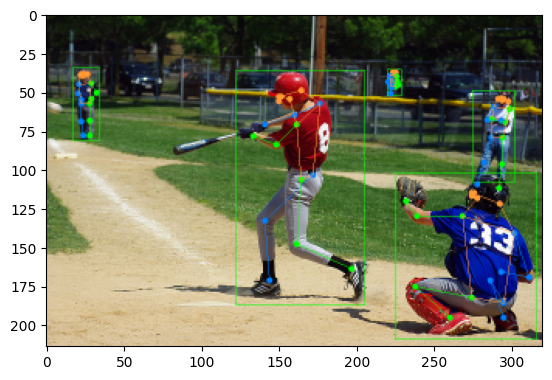

In [2]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from mmpose.apis import (inference_top_down_pose_model, init_pose_model,
                         vis_pose_result, process_mmdet_results)
from mmdet.apis import inference_detector, init_detector

local_runtime = False

pose_config = '../mmpose/configs/body/2d_kpt_sview_rgb_img/topdown_heatmap/coco/hrnet_w48_coco_256x192.py'
pose_checkpoint = 'https://download.openmmlab.com/mmpose/top_down/hrnet/hrnet_w48_coco_256x192-b9e0b3ab_20200708.pth'
det_config = '../mmpose/demo/mmdetection_cfg/faster_rcnn_r50_fpn_coco.py'
det_checkpoint = 'https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

# initialize pose model
pose_model = init_pose_model(pose_config, pose_checkpoint)
# initialize detector
det_model = init_detector(det_config, det_checkpoint)

img = '../mmpose/tests/data/coco/000000196141.jpg'

# inference detection
mmdet_results = inference_detector(det_model, img)

# extract person (COCO_ID=1) bounding boxes from the detection results
person_results = process_mmdet_results(mmdet_results, cat_id=1)

# inference pose
pose_results, returned_outputs = inference_top_down_pose_model(
    pose_model,
    img,
    person_results,
    bbox_thr=0.3,
    format='xyxy',
    dataset=pose_model.cfg.data.test.type)

# show pose estimation results
vis_result = vis_pose_result(
    pose_model,
    img,
    pose_results,
    dataset=pose_model.cfg.data.test.type,
    show=False)
# reduce image size
vis_result = cv2.resize(vis_result, dsize=None, fx=0.5, fy=0.5)

if local_runtime:
    from IPython.display import Image, display
    import tempfile
    import os.path as osp
    with tempfile.TemporaryDirectory() as tmpdir:
        file_name = osp.join(tmpdir, 'pose_results.png')
        cv2.imwrite(file_name, vis_result)
        display(Image(file_name))
else:
    plt.imshow(cv2.cvtColor(vis_result, cv2.COLOR_BGR2RGB))
    plt.show()
    # cv2.imshow(vis_result)


In [3]:
mmdet_results

[array([[2.45303452e+02, 7.23254242e+01, 4.11167023e+02, 3.75046112e+02,
         9.99272764e-01],
        [4.50460236e+02, 2.04473816e+02, 6.32553162e+02, 4.19323639e+02,
         9.98901248e-01],
        [3.50599022e+01, 6.87164230e+01, 6.89989014e+01, 1.63756424e+02,
         9.97204721e-01],
        [5.50762024e+02, 9.88542023e+01, 6.04064636e+02, 2.16213776e+02,
         9.94753599e-01],
        [4.40200378e+02, 7.15229568e+01, 4.58268341e+02, 1.05718811e+02,
         9.44470644e-01],
        [3.99359863e+02, 7.19021454e+01, 4.08000183e+02, 1.05062500e+02,
         2.66878486e-01],
        [6.11915466e+02, 9.42493439e+01, 6.28200684e+02, 1.15073341e+02,
         2.54857302e-01],
        [6.03409546e+02, 9.34462662e+01, 6.23957397e+02, 1.13636307e+02,
         1.86216414e-01],
        [4.55401184e+02, 8.08559647e+01, 4.63005188e+02, 9.87414246e+01,
         1.16714023e-01],
        [6.16709595e+02, 9.34346313e+01, 6.31103027e+02, 1.10982681e+02,
         7.05609545e-02],
        [5

In [4]:
person_results

[{'bbox': array([245.30345   ,  72.325424  , 411.16702   , 375.0461    ,
           0.99927276], dtype=float32)},
 {'bbox': array([450.46024   , 204.47382   , 632.55316   , 419.32364   ,
           0.99890125], dtype=float32)},
 {'bbox': array([ 35.059902 ,  68.71642  ,  68.9989   , 163.75642  ,   0.9972047],
        dtype=float32)},
 {'bbox': array([550.762    ,  98.8542   , 604.06464  , 216.21378  ,   0.9947536],
        dtype=float32)},
 {'bbox': array([440.20038   ,  71.52296   , 458.26834   , 105.71881   ,
           0.94447064], dtype=float32)},
 {'bbox': array([3.9935986e+02, 7.1902145e+01, 4.0800018e+02, 1.0506250e+02,
         2.6687849e-01], dtype=float32)},
 {'bbox': array([6.1191547e+02, 9.4249344e+01, 6.2820068e+02, 1.1507334e+02,
         2.5485730e-01], dtype=float32)},
 {'bbox': array([6.0340955e+02, 9.3446266e+01, 6.2395740e+02, 1.1363631e+02,
         1.8621641e-01], dtype=float32)},
 {'bbox': array([4.5540118e+02, 8.0855965e+01, 4.6300519e+02, 9.8741425e+01,
        

In [10]:
for p in person_results:
    print(p)
    print(type(p['bbox']))

{'bbox': array([245.30345   ,  72.325424  , 411.16702   , 375.0461    ,
         0.99927276], dtype=float32)}
<class 'numpy.ndarray'>
{'bbox': array([450.46024   , 204.47382   , 632.55316   , 419.32364   ,
         0.99890125], dtype=float32)}
<class 'numpy.ndarray'>
{'bbox': array([ 35.059902 ,  68.71642  ,  68.9989   , 163.75642  ,   0.9972047],
      dtype=float32)}
<class 'numpy.ndarray'>
{'bbox': array([550.762    ,  98.8542   , 604.06464  , 216.21378  ,   0.9947536],
      dtype=float32)}
<class 'numpy.ndarray'>
{'bbox': array([440.20038   ,  71.52296   , 458.26834   , 105.71881   ,
         0.94447064], dtype=float32)}
<class 'numpy.ndarray'>
{'bbox': array([3.9935986e+02, 7.1902145e+01, 4.0800018e+02, 1.0506250e+02,
       2.6687849e-01], dtype=float32)}
<class 'numpy.ndarray'>
{'bbox': array([6.1191547e+02, 9.4249344e+01, 6.2820068e+02, 1.1507334e+02,
       2.5485730e-01], dtype=float32)}
<class 'numpy.ndarray'>
{'bbox': array([6.0340955e+02, 9.3446266e+01, 6.2395740e+02, 1.1